<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,9.170792e-05,99.743116,99.742959,0.000157
1,0.0,1.0,37.900544,58.504065,68.664496,-3.302126e-07,175.069104,175.069108,-0.000003
2,0.0,2.0,87.593033,21.241037,47.441774,-2.260972e-04,166.275617,166.275751,-0.000134
3,0.0,3.0,98.216857,82.743114,43.681410,-8.002094e-06,234.641373,234.641346,0.000027
4,0.0,4.0,73.952398,88.836999,37.886121,9.339419e-08,210.675517,210.675503,0.000015
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-1.133373e-06,146.386556,146.386566,-0.000010
59996,999.0,56.0,72.351748,49.220878,78.295983,4.710564e-05,209.868656,209.868621,0.000035
59997,999.0,57.0,34.807520,64.623783,30.844892,2.283354e-06,140.276197,140.276201,-0.000003
59998,999.0,58.0,65.490258,52.830330,51.520095,-9.938816e-06,179.840673,179.840692,-0.000019


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,9.170792e-05,99.743116,99.742959,0.000157
1,0.0,1.0,37.900544,58.504065,68.664496,-3.302126e-07,175.069104,175.069108,-0.000003
2,0.0,2.0,87.593033,21.241037,47.441774,-2.260972e-04,166.275617,166.275751,-0.000134
3,0.0,3.0,98.216857,82.743114,43.681410,-8.002094e-06,234.641373,234.641346,0.000027
4,0.0,4.0,73.952398,88.836999,37.886121,9.339419e-08,210.675517,210.675503,0.000015
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-1.133373e-06,146.386556,146.386566,-0.000010
59996,999.0,56.0,72.351748,49.220878,78.295983,4.710564e-05,209.868656,209.868621,0.000035
59997,999.0,57.0,34.807520,64.623783,30.844892,2.283354e-06,140.276197,140.276201,-0.000003
59998,999.0,58.0,65.490258,52.830330,51.520095,-9.938816e-06,179.840673,179.840692,-0.000019


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.489935  30.860132  21.392958  ...   99.743116   99.742959  0.000157
      1.0    37.900544  58.504065  68.664496  ...  175.069104  175.069108 -0.000003
      2.0    87.593033  21.241037  47.441774  ...  166.275617  166.275751 -0.000134
      3.0    98.216857  82.743114  43.681410  ...  234.641373  234.641346  0.000027
      4.0    73.952398  88.836999  37.886121  ...  210.675517  210.675503  0.000015
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.119519  51.443529  27.823509  ...  146.386556  146.386566 -0.000010
      56.0   72.351748  49.220878  78.295983  ...  209.868656  209.868621  0.000035
      57.0   34.807520  64.623783  30.844892  ...  140.276197  140.276201 -0.000003
      58.0   65.490258  52.830330  51.520095  ...  179.840673  179.840692 -0.000019
      59.0   49.286070  46.415970  33.211294  ...  138.913344  138.913347 -0.000004

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.489935  30.860132  21.392958  ...   99.743116   99.742959  0.000157
      1.0    37.900544  58.504065  68.664496  ...  175.069104  175.069108 -0.000003
      2.0    87.593033  21.241037  47.441774  ...  166.275617  166.275751 -0.000134
      3.0    98.216857  82.743114  43.681410  ...  234.641373  234.641346  0.000027
      4.0    73.952398  88.836999  37.886121  ...  210.675517  210.675503  0.000015
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.119519  51.443529  27.823509  ...  146.386556  146.386566 -0.000010
      56.0   72.351748  49.220878  78.295983  ...  209.868656  209.868621  0.000035
      57.0   34.807520  64.623783  30.844892  ...  140.276197  140.276201 -0.000003
      58.0   65.490258  52.830330  51.520095  ...  179.840673  179.840692 -0.000019
      59.0   49.286070  46.415970  33.211294  ...  138.913344  138.913347 -0.000004

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,9.170792e-05,99.743116,99.742959,0.000157
1,0.0,1.0,37.900544,58.504065,68.664496,-3.302126e-07,175.069104,175.069108,-0.000003
2,0.0,2.0,87.593033,21.241037,47.441774,-2.260972e-04,166.275617,166.275751,-0.000134
3,0.0,3.0,98.216857,82.743114,43.681410,-8.002094e-06,234.641373,234.641346,0.000027
4,0.0,4.0,73.952398,88.836999,37.886121,9.339419e-08,210.675517,210.675503,0.000015
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-1.133373e-06,146.386556,146.386566,-0.000010
59996,999.0,56.0,72.351748,49.220878,78.295983,4.710564e-05,209.868656,209.868621,0.000035
59997,999.0,57.0,34.807520,64.623783,30.844892,2.283354e-06,140.276197,140.276201,-0.000003
59998,999.0,58.0,65.490258,52.830330,51.520095,-9.938816e-06,179.840673,179.840692,-0.000019


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.489935  30.860132  21.392958  ...   99.743116   99.742959  0.000157
      1.0    37.900544  58.504065  68.664496  ...  175.069104  175.069108 -0.000003
      2.0    87.593033  21.241037  47.441774  ...  166.275617  166.275751 -0.000134
      3.0    98.216857  82.743114  43.681410  ...  234.641373  234.641346  0.000027
      4.0    73.952398  88.836999  37.886121  ...  210.675517  210.675503  0.000015
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   57.119519  51.443529  27.823509  ...  146.386556  146.386566 -0.000010
      56.0   72.351748  49.220878  78.295983  ...  209.868656  209.868621  0.000035
      57.0   34.807520  64.623783  30.844892  ...  140.276197  140.276201 -0.000003
      58.0   65.490258  52.830330  51.520095  ...  179.840673  179.840692 -0.000019
      59.0   49.286070  46.415970  33.211294  ...  138.913344  138.913347 -0.000004

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

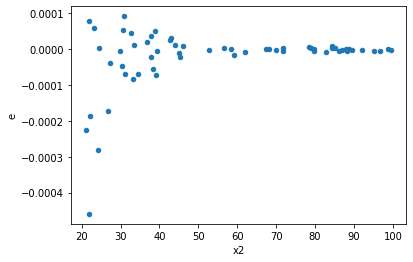

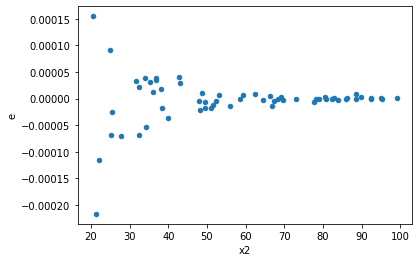

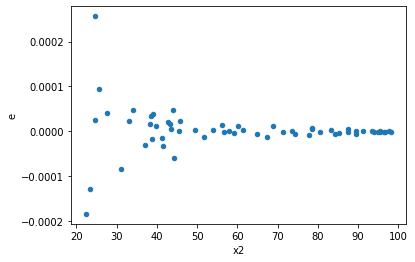

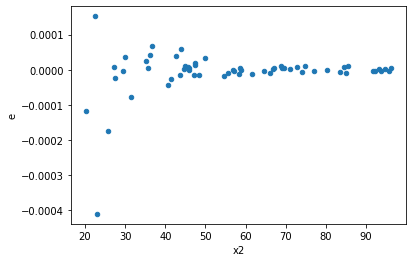

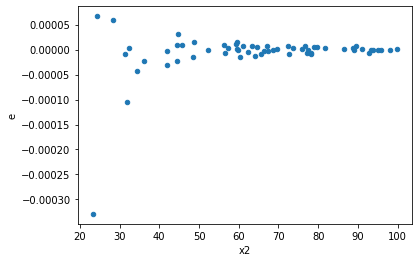

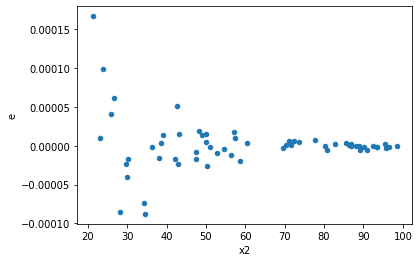

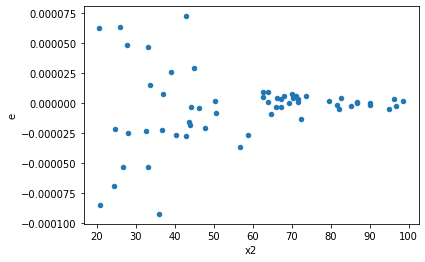

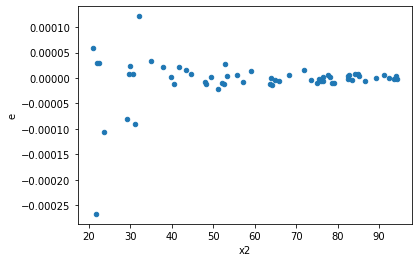

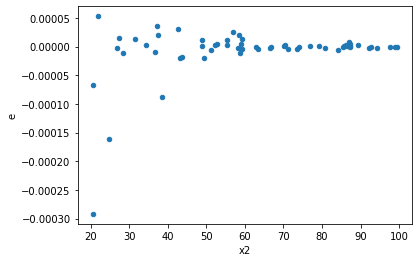

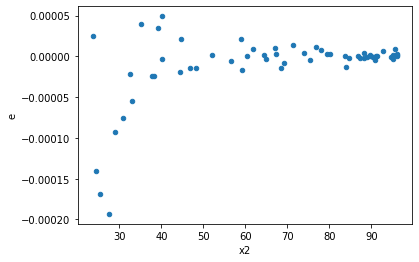

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,2.6982110572594587e-10,2.2293220131740084e-07,1.3491055286297293e-11,1.1146610065870042e-08,0.001210328091372438,8.273756453157182e-26,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,2.2187747628889684e-10,9.822776600839557e-08,1.1093873814444843e-11,4.911388300419779e-09,0.0022588060922604397,5.678509189055321e-23,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,2.5474158759775484e-10,1.3651279835836075e-07,1.2737079379887742e-11,6.825639917918038e-09,0.0018660637732224258,7.700105053478574e-24,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,7.015033286616125e-10,1.938229307827562e-07,3.5075166433080625e-11,9.69114653913781e-09,0.003619299975645725,7.812136703735813e-21,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,5.286845949660586e-10,1.0559931160841667e-07,2.643422974830293e-11,5.279965580420833e-09,0.005006515543647923,2.295284853152726e-19,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,1.6196466271767213e-10,6.061694471981464e-08,8.098233135883606e-12,3.030847235990732e-09,0.0026719370873327553,3.2866206232021867e-22,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,3.5478637410636944e-10,4.693033009496919e-08,1.7739318705318473e-11,2.3465165047484597e-09,0.00755985251730419,1.655703623599053e-17,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,4.903904524901996e-10,1.0842780042050792e-07,2.4519522624509977e-11,5.4213900210253955e-09,0.004522737255467258,7.969581130421933e-20,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1.7792537950298744e-10,1.0025939548327968e-07,8.896268975149373e-12,5.012969774163984e-09,0.0017746504319653528,4.552111885902053e-24,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64